In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

In [67]:
df = pd.read_csv("data.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,D_0,-166.792114,48.673981,-61.681690,23.588770,-24.922943,-22.071186,-25.099222,-14.969215,-22.405672,...,0.198428,0.025338,0.153881,0.046216,0.057083,0.014590,0.019117,0.136555,2436.000953,229407.109103
1,D_0,-196.336411,137.743591,-30.724380,35.839794,-24.167620,8.170997,-8.422764,6.116524,-9.430403,...,0.102050,0.077792,0.051169,0.093380,0.070790,0.105666,0.014385,0.117292,1553.866767,127935.952433
2,D_0,-255.626404,97.742905,-91.593735,4.170034,-29.750544,-26.448723,-19.965393,-17.997416,-1.946816,...,0.034188,0.136815,0.013002,0.124663,0.078147,0.080960,0.074701,0.022163,1788.712108,83405.215831
3,D_0,-202.974701,79.678085,-83.443153,2.970738,-63.702785,-8.550585,-37.902176,-5.894975,-21.274141,...,0.056353,0.096599,0.016630,0.158240,0.062040,0.088392,0.071505,0.081503,2253.616971,210885.140703
4,D_0,-60.888184,99.207787,12.871638,7.476836,-8.987703,18.245726,-8.740259,11.888105,-19.923634,...,0.092568,0.035146,0.132840,0.031000,0.072270,0.025156,0.016877,0.041455,2222.938917,174010.699956


In [107]:
X = df.drop(["0"], axis=1)
y = df["0"]
encoder = LabelEncoder()
y = encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25)

Normalization

In [72]:
scaler = StandardScaler()
X_test = scaler.fit_transform(np.array(X_test, dtype = float))
X_train = scaler.transform(np.array(X_train, dtype = float))

### MLP

In [48]:
MLP = MLPClassifier(hidden_layer_sizes = (128, 64, 32, 8), batch_size = 16, solver = 'sgd', random_state=4, 
                      verbose=False, momentum=0.85, max_iter=400, learning_rate_init = 0.006)
MLP.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size=16, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(128, 64, 32, 8), learning_rate='constant',
       learning_rate_init=0.006, max_iter=400, momentum=0.85,
       nesterovs_momentum=True, power_t=0.5, random_state=4, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [49]:
print("MLP Classifier Train accuracy: ", MLP.score(X_train, y_train)*100)
print("MLP Classifier Test accuracy: ", MLP.score(X_test, y_test)*100)

MLP Classifier Train accuracy:  99.50106913756237
MLP Classifier Test accuracy:  81.68210976478973


In [51]:
def plot_roc_curve(model, X, y, n_classes):
    y = label_binarize(y, classes = list(range(n_classes)))
    y_pred = label_binarize(model.predict(X), classes = list(range(n_classes)))

    for i in range(n_classes):
        fpr, tpr, thresholds = roc_curve(y[:, i], y_pred[:, i])
        roc_auc = auc(fpr, tpr)
        label = 'ROC of class {0} (area={1:0.2f})'.format(i, roc_auc)
        plt.plot(fpr, tpr, label = label)
        plt.plot([0, 1], [0, 1], linestyle = '--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc = 'lower right')
        
    plt.show()

Train: 


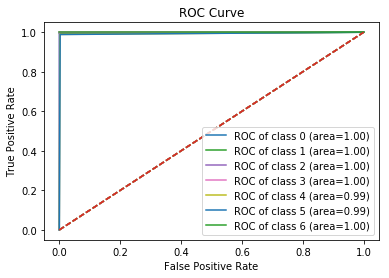

In [52]:
print("Train: ")
plot_roc_curve(MLP, X_train, y_train, n_classes = 7)

Test: 


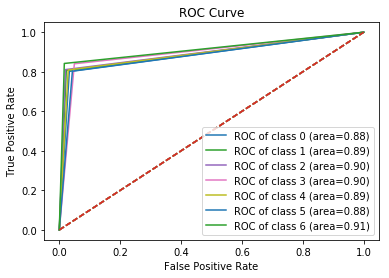

In [54]:
print("Test: ")
plot_roc_curve(MLP, X_test, y_test, n_classes = 7)

## Logistic Regression

In [333]:
LR_ovr = LogisticRegression( penalty='l2', random_state=0, max_iter=1000,C=50)
LR_ovr.fit(X_train, y_train)

LogisticRegression(C=50, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [334]:
LR_ovr.score(X_test, y_test)

0.45195729537366547

In [131]:
model = LogisticRegression(penalty='l2', verbose=1, n_jobs=-1)
from sklearn.model_selection import train_test_split, GridSearchCV
params = {
    'solver':['lbfgs', 'newton-cg', 'liblinear', 'sag'],
    'multi_class':['ovr', 'multinomial']
}
     
   
clf = GridSearchCV(
    model,
    param_grid=params,
   # scoring=f1_score,
    cv=5
)

clf.fit(X_train, y_train) 